## Notebook Imports and Packages

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm ##cm - color map
from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example of a Cost Function

$f(x) = x^2 + x + 1$

In [106]:
def f(x):
    return x**2 + x + 1

In [107]:
#Generate x

x_1 = np.linspace(start=-2, stop=2, num=300)

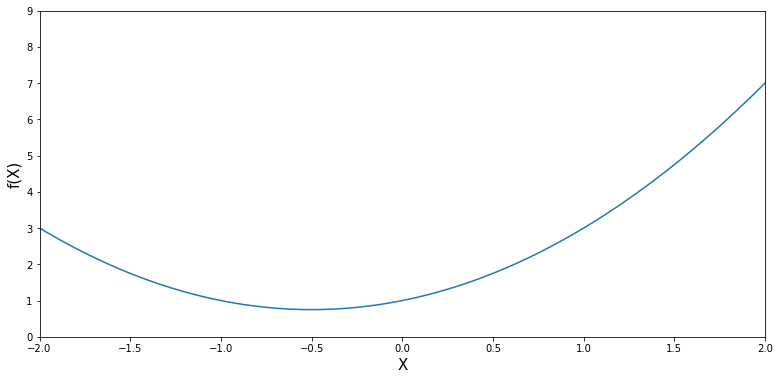

In [108]:
#plot graph

plt.figure(figsize=(13, 6))
           
plt.xlim([-2, 2])
plt.ylim(0, 9)
plt.xlabel('X', fontsize=15)
plt.ylabel('f(X)', fontsize=15)

plt.plot(x_1, f(x_1))
plt.show()

In [109]:
def df(x):
    return (2*x + 1)

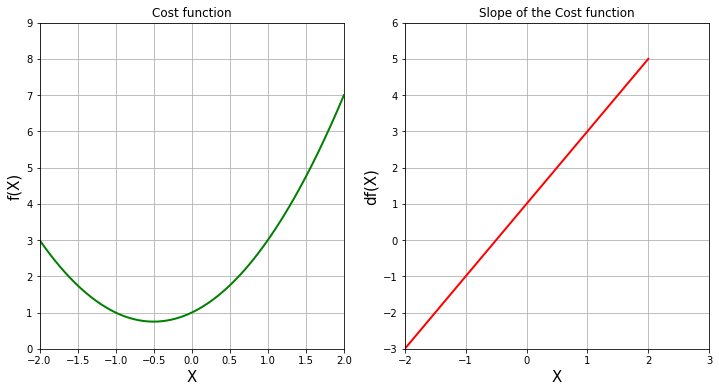

In [110]:
#plot two graphs: gradient and linear (deriv)

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-2, 2])
plt.ylim(0, 9)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('f(X)', fontsize=15)

plt.plot(x_1, f(x_1), color='g', linewidth=2)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-2, 3])
plt.ylim(-3, 6)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('df(X)', fontsize=15)

plt.plot(x_1, df(x_1),  color='r', linewidth=2)
plt.show()

In [111]:
#Gradient Descent

previous_x = 0
new_x = 3
step_multiplier = 0.1
precision = 0.001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    if step_size <= precision:
        print('Loop ran', n, 'times')
        break
    
print('Local min occurs at', new_x)
print('Slope or df(x) at this point occurs at', df(new_x))
print('Cost or f(x) value at this point occurs at', f(new_x))

Loop ran 30 times
Local min occurs at -0.4965337678900009
Slope or df(x) at this point occurs at 0.006932464219998158
Cost or f(x) value at this point occurs at 0.7500120147650404


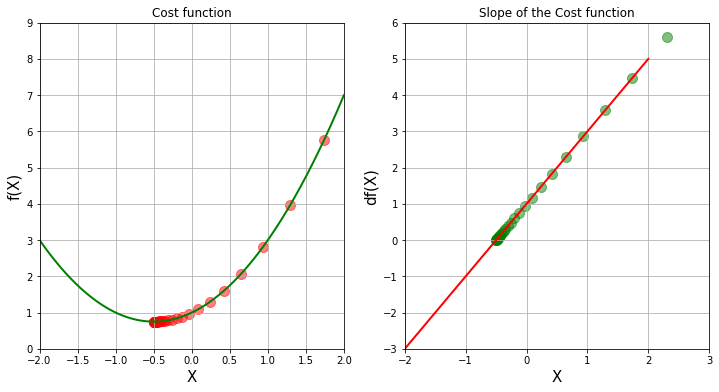

In [112]:
#superimpose the gradient descent calc

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-2, 2])
plt.ylim(0, 9)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('f(X)', fontsize=15)

plt.plot(x_1, f(x_1), color='g', linewidth=2)

array_list = np.array(x_list)
plt.scatter(x_list, f(array_list), color='red', s=100, alpha=0.5)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-2, 3])
plt.ylim(-3, 6)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('df(X)', fontsize=15)

plt.plot(x_1, df(x_1), color='r', linewidth=2)

plt.scatter(x_list, slope_list, s=100, color='green', alpha=0.5)

plt.show()

## Minimal Gradient Descent

### $g(x) = x^4 - 4x^2 + 5$

In [113]:
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

## second order deriv
def dg(x):
    return 4*x**3 - 8*x



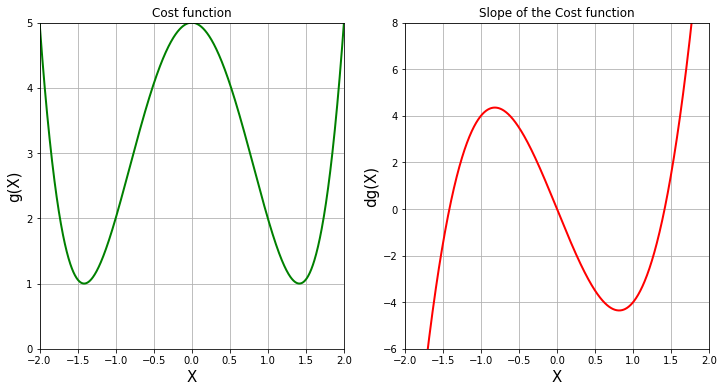

In [114]:
#plot two graphs: gradient and linear (deriv)

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-2, 2])
plt.ylim(0, 5)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('g(X)', fontsize=15)

plt.plot(x_2, g(x_2), color='g', linewidth=2)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('dg(X)', fontsize=15)

plt.plot(x_2, dg(x_2),  color='r', linewidth=2)
plt.show()

## Gradient Descent as a Python Function

In [115]:
def gradient_descent(deriv_func, initial_guess, multiplier=0.03, precision=0.0001, max_iter=500):
    
    new_x = initial_guess
    
    x_list = [new_x]
    slope_list = [deriv_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = deriv_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(deriv_func(new_x))
        
        if step_size <= precision:
            break
    
    return new_x, x_list, slope_list

In [116]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5)
print('Local min: ', local_min)
print('Number of steps: ', len(list_x))

Local min:  1.4141479705779265
Number of steps:  20


In [117]:
local_min, list_x, deriv_list = gradient_descent(deriv_func=dg, initial_guess=-0.98, 
                                                 multiplier=0.02, precision=0.001)
print('Local min: ', local_min)
print('Number of steps: ', len(list_x))

Local min:  -1.4121773034682756
Number of steps:  17


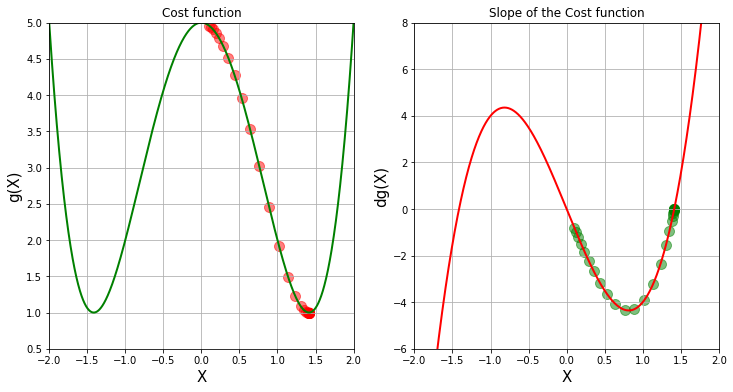

In [118]:
#Gradient function

local_min, list_x, deriv_list = gradient_descent(deriv_func=dg, initial_guess=0.1)

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-2, 2])
plt.ylim(0.5, 5)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('g(X)', fontsize=15)

plt.plot(x_2, g(x_2), color='g', linewidth=2)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.5)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('dg(X)', fontsize=15)

plt.plot(x_2, dg(x_2),  color='r', linewidth=2)
plt.scatter(list_x, deriv_list, color='g', alpha=0.5, s=100)
plt.show()

## Divergence, Overflow and Tuples

## $h(x) = x^5 - 2x^4 + 3$

In [119]:
#make data

x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 3

def dh(x):
    return 5*x**4 - 8*x**3

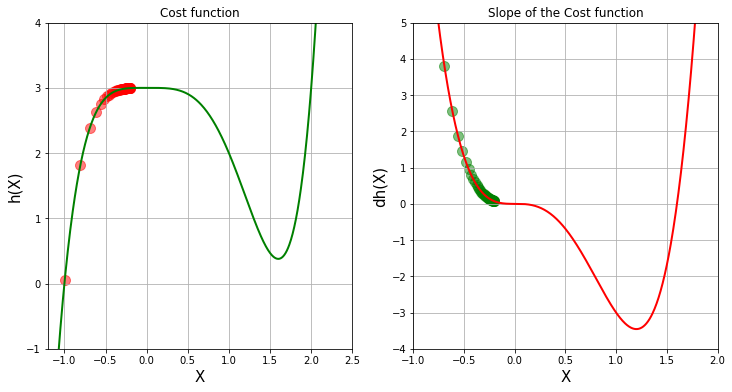

local min occured at -3.678525716395994e+54
Cost at this minimum -6.735486695296058e+272
Number of steps 51


In [120]:
#Gradient function

local_min, list_x, deriv_list = gradient_descent(deriv_func=dh, initial_guess=-0.2, max_iter=50)

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('h(X)', fontsize=15)

plt.plot(x_3, h(x_3), color='g', linewidth=2)
plt.scatter(list_x, h(np.array(list_x)), color='r', s=100, alpha=0.5)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-1, 2])
plt.ylim(-4, 5)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('dh(X)', fontsize=15)

plt.plot(x_3, dh(x_3),  color='r', linewidth=2)
plt.scatter(list_x, deriv_list, color='g', alpha=0.5, s=100)
plt.show()

print('local min occured at', local_min)
print('Cost at this minimum', h(local_min))
print('Number of steps', len(list_x))

In [121]:
#import sys
#sys.float_info.max

## The Learning Rate

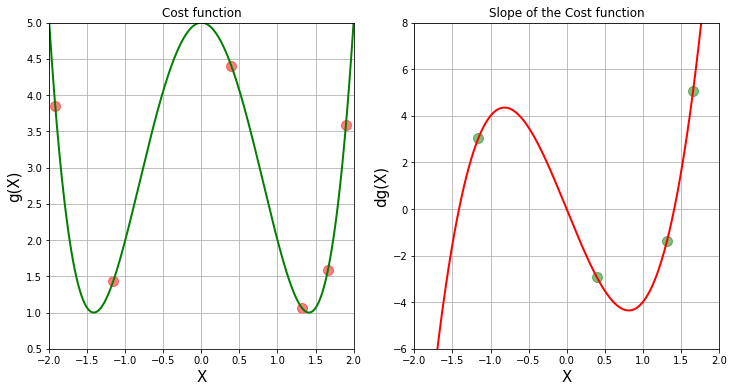

Number of steps = 6


In [122]:
#Gradient function

local_min, list_x, deriv_list = gradient_descent(deriv_func=dg, initial_guess=1.9, multiplier=0.25, max_iter=5)

plt.figure(figsize=(12, 6))

## Graph 1: Cost
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlim([-2, 2])
plt.ylim(0.5, 5)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('g(X)', fontsize=15)

plt.plot(x_2, g(x_2), color='g', linewidth=2)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.5)

## Graph 2: Derivative of Cost
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost function')
plt.xlim([-2, 2])
plt.ylim(-6, 8)
plt.grid()
plt.xlabel('X', fontsize=15)
plt.ylabel('dg(X)', fontsize=15)

plt.plot(x_2, dg(x_2),  color='r', linewidth=2)
plt.scatter(list_x, deriv_list, color='g', alpha=0.5, s=100)
plt.show()

print('Number of steps =', len(list_x))

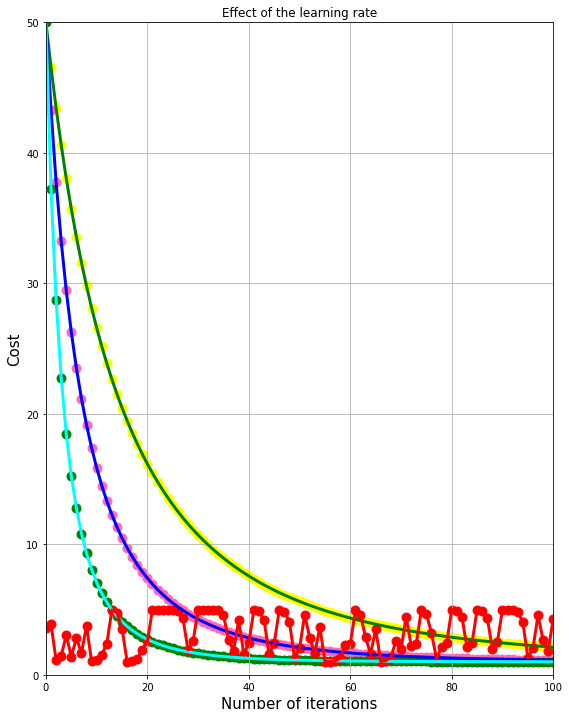

In [123]:
# Run Gradient Descent 3 times
n = 100

low_gamma = gradient_descent(deriv_func=dg, initial_guess=3, multiplier=0.0005, 
                                                 precision=0.0001, max_iter=n)

#plot two more learning rates: mid-gamma and high-gamma
mid_gamma = gradient_descent(deriv_func=dg, initial_guess=3, multiplier=0.001, 
                                                 precision=0.0001, max_iter=n)

high_gamma = gradient_descent(deriv_func=dg, initial_guess=3, multiplier=0.002, 
                                                 precision=0.0001, max_iter=n)

insane_gamma = gradient_descent(deriv_func=dg, initial_guess=1.9, multiplier=0.2, 
                                                 precision=0.0001, max_iter=n)

plt.figure(figsize=(20, 12))

## plotting reduction in cost for each iteration
plt.subplot(1, 2, 1)

plt.title('Effect of the learning rate')
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.xlim(0, n)
plt.ylim(0, 50)
plt.grid()

# Values for the chart
# y-axis: convert first to np
low_values = np.array(low_gamma[1])

#x-axis: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#plotting low learning rate
plt.plot(iteration_list, g(low_values), color='g', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='yellow', s=80)

#plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='b', linewidth=3)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='hotpink', s=80)

#plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='cyan', linewidth=3)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='g', s=80)

#plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='r', linewidth=3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='r', s=80)

plt.show()

# Data Visualization using 3D charts

## Minimize $f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$

### Minimize $f(x, y) = \frac{1}{r+1}$ where r = $3^{(-x^2 - y^2)}$

In [124]:
def f(x, y):
    r= 3**(-x**2 - y**2)
    return 1 / (r+1)

In [125]:
x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)

Array after meshgrid: (200, 200)


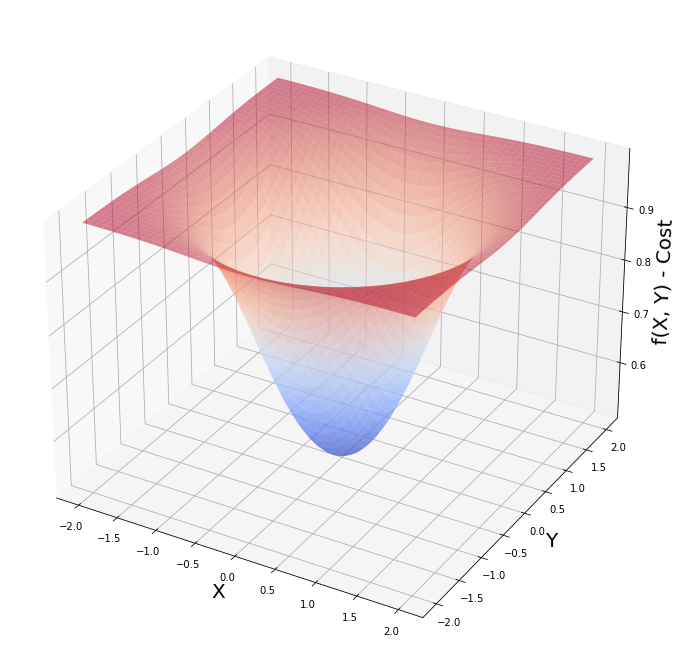

In [126]:
#plot 3D graph

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha=0.5)

plt.show()

## Partial Derivatives and Symbolic Computations

## $\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$

## $\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$

In [127]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivative wrt to x is:', diff(f(a, b), a))

print('Value of f(x, y) at x=1.8, and y=1.0 is:', 
      f(a, b).evalf(subs={a:1.8, b:1.0}))

print('Value of df(x, y), x at x=1.8 and y=1.0 is:', 
      diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))    


Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, and y=1.0 is: 0.990604794032582
Value of df(x, y), x at x=1.8 and y=1.0 is: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [128]:
#Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [129]:
# partial derivative function

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [130]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [131]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

values_array = params.reshape(1,2) ## transform matrix
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
#Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [132]:
## Advanced Numpy array funciton

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black though', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print(hs_band[0])
print(hs_band[1][0])

#the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0]) #slicing

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
['Black though' 'MC']
Questlove
[['Black though' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black though' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


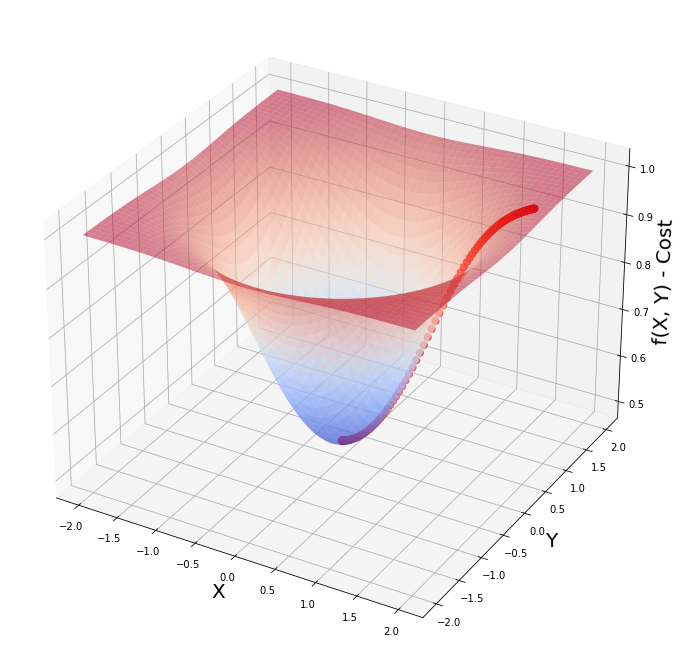

In [133]:
#plot 3D graph

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha=0.5)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='r')

plt.show()

## Example 5 - Working with Data and Real Cost Function
## Mean Squared Error: A Cost Function for Regression Problems

### $RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$
### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2$
### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y}\big)^2$

In [134]:
x_5 = np.array([0.3, 2.1, 1.4, 5.3, 0.5, 5.5, 2.3])
y_5 = np.array([9.4, 3.5, 7.2, 1.2, 0.5, 0.4, 0.9])

x_5.shape, y_5.shape # 1 row and 7 columns

((7,), (7,))

In [135]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7, 1)

x_5.shape, y_5.shape 

((7, 1), (7, 1))

In [136]:
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0:', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1:  1.2227264637835915


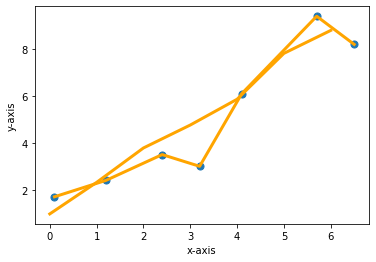

In [137]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, y_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [138]:
# y_hat = theta0 + theta1x

y_hat = 0.8475351486029536 + 0.8475351486029536* x_5
print('Est values y_hat are:\n', y_hat)
print('In comparison, the actual y-values are \n', y_5)

Est values y_hat are:
 [[0.93228866]
 [1.86457733]
 [2.88161951]
 [3.55964762]
 [4.32242926]
 [5.6784855 ]
 [6.35651361]]
In comparison, the actual y-values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [139]:
# Challenge: Write the python function for MSE 

def mse(y, y_hat):
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [140]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [3.13993258]
MSE regression using manual calc is: 3.139932576776666
MSE regression using manual calc is: 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thethas

In [141]:
nr_thetas = 500
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [142]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
# Nested loop prac
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


In [144]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
plot_cost

array([[108.51285714, 108.36519738, 108.21766613, ...,  50.96601998,
         50.88223145,  50.79857143],
       [107.86080303, 107.7135692 , 107.56646388, ...,  50.52565337,
         50.44229077,  50.35905668],
       [107.21075006, 107.06394216, 106.91726277, ...,  50.08728791,
         50.00435123,  49.92154307],
       ...,
       [ 31.09440308,  31.15843082,  31.22258708, ...,  78.75625504,
         78.88415401,  79.01218149],
       [ 31.43691526,  31.50136893,  31.56595111, ...,  79.31045472,
         79.43877962,  79.56723303],
       [ 31.78142857,  31.84630817,  31.91131629, ...,  79.86665554,
         79.99540637,  80.12428571]])

In [145]:
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (500, 500)
Shape of plot_t1 (500, 500)
Shape of plot_cost (500, 500)


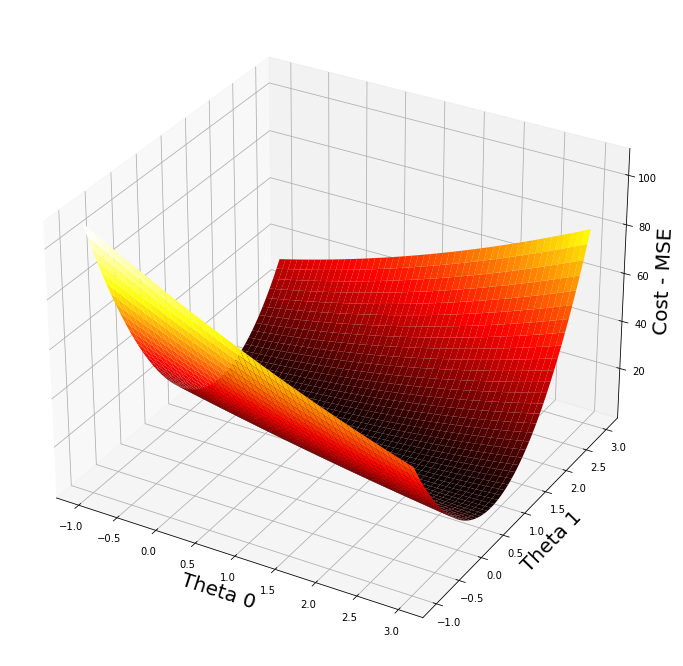

In [146]:
# Plotting MSE

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

In [147]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)

print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 for ij_min occurs at:', plot_t0[277][231])
print('Min MSE for Theta 1 for ij_min occurs at:', plot_t1[277][231])

Min value of plot_cost 0.9480011439999955
Min occurs at (i,j): (277, 231)
Min MSE for Theta 0 for ij_min occurs at: 0.8517034068136271
Min MSE for Theta 1 for ij_min occurs at: 1.220440881763527


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $\frac{\partial MSE} {\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$

## $\frac{\partial MSE} {\partial \theta_1} = -\frac{2}{n} \big( \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$

## MSE and Gradient Descent

In [148]:
# x values, y values, array of theta parameters (theta 0 at index 0 and theta 1 at index 1)

def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n)*sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n)*sum((y - thetas[0] - thetas[1]*x)*x)
    
    # there are 3 ways we can return this array function
    return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr = theta0_slope, values = theta1_slope)
    # return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [149]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# REsults
print('Min occurs at Theta_0:', thetas[0])
print('Min occurs at Theta_1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta_0: 0.8532230461743415
Min occurs at Theta_1: 1.2214935332607393
MSE is: [0.94797511]


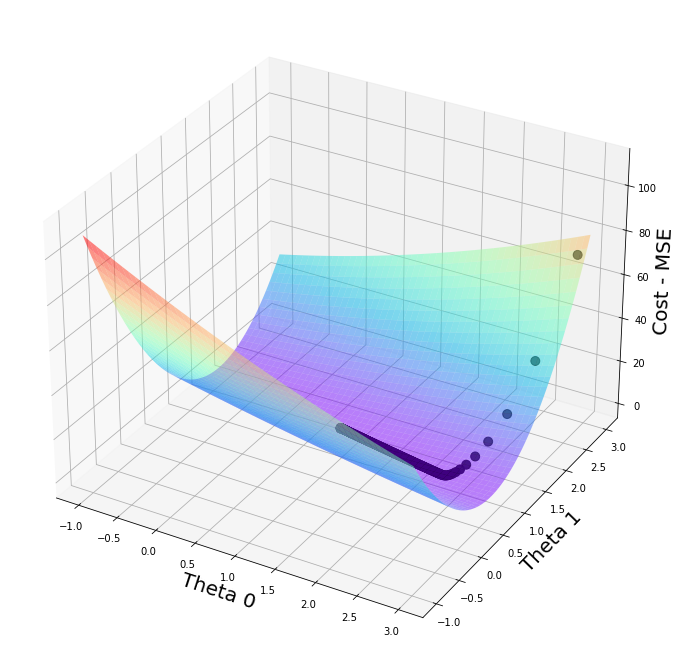

In [150]:
# Plotting MSE

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.5)
plt.show()